In [118]:
%pylab inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

scale_factor = 15

img = cv2.imread('valve_1_scaled_clean.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(imgray, 128, 255, 0)

Populating the interactive namespace from numpy and matplotlib


Creates a new image of all cells directly connected to the origin at *x,y*

In [119]:
def clean_up_valve(org_a, new_a, x, y):
    
    if (org_a[x,y] == 255) and (new_a[x,y] != 255):
        new_a[x,y] = 255
        if y+1 < 60:
            clean_up_valve(org_a, new_a, x, y+1)
        if y-1 >= 0:
            clean_up_valve(org_a, new_a, x, y-1)
        if x+1 < 20:   
            clean_up_valve(org_a, new_a, x+1, y)
        if x-1 >= 0:
            clean_up_valve(org_a, new_a, x-1, y)

    return

Assumption: origin at *8,0* -> search for origin needed

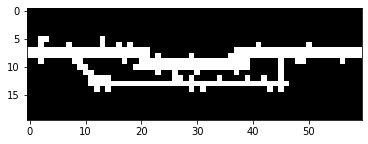

In [120]:
clean_valve = np.zeros((20,60), dtype=uint8)
clean_up_valve(thresh1, clean_valve, 8,0)

fig = plt.figure() 
ax1 = fig.add_subplot(111)
ax1.imshow(clean_valve,cmap = 'gray')



Smooths the image (parameters can be changed)

In [121]:
valve_resize_1 = cv2.resize(clean_valve, None, fx=5, fy=5, interpolation = cv2.INTER_CUBIC)
valve_blurred = cv2.GaussianBlur(valve_resize_1, (3,3),0)
valve_resize_2 = cv2.resize(valve_blurred, None, fx=scale_factor, fy=scale_factor, interpolation = cv2.INTER_CUBIC)
valve_binary = cv2.threshold(valve_resize_2, 190, 255, 0)[1]

CHAIN_APPROX_TC89_L1 produces smaller STL files then CHAIN_APPROX_SIMPLE

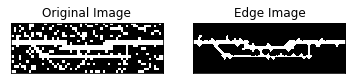

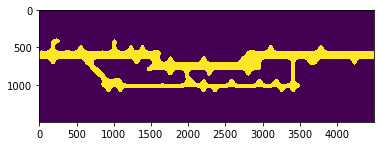

In [125]:
im2 , contours, hierarchy = cv2.findContours(valve_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_L1)

plt.subplot(121),plt.imshow(imgray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(valve_binary,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

cv2.drawContours(valve_resize_2, contours, -1, (50, 255, 0), 3)

plt.figure()
plt.imshow(valve_binary)

In [126]:
for c in range(len(contours)):
    with open('./geometry/test_valve_%d.txt' % c, 'w') as f:
        n_contour = contours[c]
        for d in range(len(n_contour)):
            XY_Coordinates = n_contour[d]
            f.write("%d;%d\n" % (XY_Coordinates[0][0], XY_Coordinates[0][1]))
len(contours[2])


1441

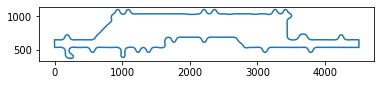

In [127]:
data = np.genfromtxt('./geometry/test_valve_2.txt', delimiter=';', skip_header=0, skip_footer=0, names=['x','y'])

fig = plt.figure() 
ax1 = fig.add_subplot(111)
ax1.plot(data['x'], data['y'], '-')
ax1.set_aspect(1)
plt.show()
#fig.savefig('test.pdf')